## Data Analysis and preprocessing

In [1]:
# Charging the necessary dependencies
import numpy as np                              # Library for using arrays and numeric calculus
import matplotlib.pyplot as plt                 # Library for plotting
import pandas as pd                             # Library for loading and handling datasets
import seaborn as sns                           # Library for providing style to the charts
from sklearn import preprocessing               # Library for preprocessing data
#import pingouin as pg
from sklearn.model_selection import train_test_split    #Library for splitting the data into training and testing datasets
%matplotlib inline

> Loading the dataset

In [2]:
url ="https://query1.finance.yahoo.com/v7/finance/download/AAPL?period1=1420088400&period2=1642414800&interval=1d&events=history&includeAdjustedClose=true"
df=pd.read_csv(url)                     # Open the file in a new variable
df.to_csv("Dataset.csv", index=False)   # Saving the dataset in a new file

In [3]:
df = pd.read_csv("Dataset.csv")
df.head()                               # Show a dataset summary

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,27.847500,27.860001,26.837500,27.332500,24.531767,212818400
1,2015-01-05,27.072500,27.162500,26.352501,26.562500,23.840666,257142000
2,2015-01-06,26.635000,26.857500,26.157499,26.565001,23.842911,263188400
3,2015-01-07,26.799999,27.049999,26.674999,26.937500,24.177235,160423600
4,2015-01-08,27.307501,28.037500,27.174999,27.972500,25.106188,237458000


In [5]:
df_0 = df.copy()                         # Generating a new variable to not modify the original file

In [6]:
df_0.describe()                          # Getting some descriptive statistics about dataset

,Open,High,Low,Close,Adj Close,Volume
count,1773.000000,1773.000000,1773.000000,1773.000000,1773.000000,1.773000e+03
mean,61.989952,62.652619,61.353823,62.032640,60.048363,1.377490e+08
std,41.084410,41.584347,40.602374,41.116116,41.348525,6.968048e+07
min,22.500000,22.917500,22.367500,22.584999,20.854187,4.100000e+07
25%,31.525000,31.782499,31.264999,31.502501,28.467155,9.031800e+07
50%,43.985001,44.437500,43.715000,44.142502,42.111904,1.186496e+08
75%,78.397499,79.392502,77.727501,78.285004,76.860344,1.645604e+08
max,182.630005,182.940002,179.119995,182.009995,180.434296,6.488252e+08


In [7]:
df_0.dtypes                               # Checking the type of variables

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [8]:
# Changing the type of values in order to minimize the size of the file, lower the values, faster the compile process.
df_0=df_0.astype({'Open':'float32', 'High':'float32', 'Low':'float32', 'Close':'float32' })

In [9]:
df_0.dtypes                                 # Verifying the new type of data

Date          object
Open         float32
High         float32
Low          float32
Close        float32
Adj Close    float64
Volume         int64
dtype: object

In [10]:
df_0.count()

Date         1773
Open         1773
High         1773
Low          1773
Close        1773
Adj Close    1773
Volume       1773
dtype: int64

In [11]:
df_0 = df_0.dropna()
df_0 = df_0.reset_index(drop=True)  # Reiniciar los índices
df_0.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,27.847500,27.860001,26.837500,27.332500,24.531767,212818400
1,2015-01-05,27.072500,27.162500,26.352501,26.562500,23.840666,257142000
2,2015-01-06,26.635000,26.857500,26.157499,26.565001,23.842911,263188400
3,2015-01-07,26.799999,27.049999,26.674999,26.937500,24.177235,160423600
4,2015-01-08,27.307501,28.037500,27.174999,27.972500,25.106188,237458000


## Histograms of the features

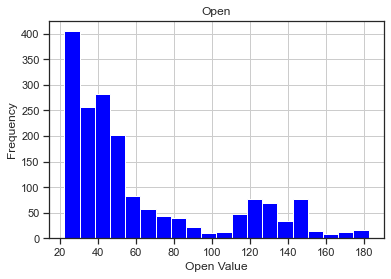

In [13]:
sns.set(style='ticks')                                          # Giving some style to the charts
df_0.hist(column='Open', bins=20, color='blue')     # We get the histogram of the Cs feature with 20 bins in color blue
plt.ylabel('Frequency')                                         # Defining the name of the y-axis
plt.xlabel('Open Value')                                        # Defining the name of the x-axis
plt.savefig('Open.jpg')                                       # Saving the figure

Text(0.5, 0, 'Close Value')

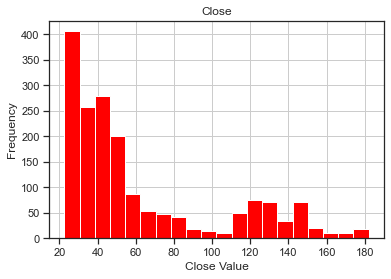

In [13]:
sns.set(style='ticks')                                          # Giving some style to the charts
df_0.hist(column='Close', bins=20, color='red')                 # We get the histogram of the Cs feature with 20 bins in color blue
plt.ylabel('Frequency')                                         # Defining the name of the y-axis
plt.xlabel('Close Value')                                        # Defining the name of the x-axis
#plt.savefig('Open.pdf')                                        # Saving the figure

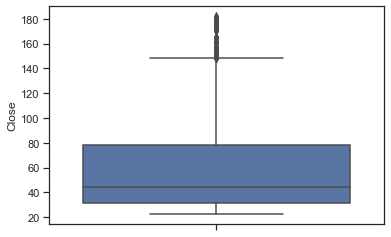

In [14]:
sns.boxplot(data=df_0, y='Close');
#sns.swarmplot(data = df_0, y='Close', alpha=0.5)

In [15]:
df_0

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,27.847500,27.860001,26.837500,27.332500,24.531763,212818400
1,2015-01-05,27.072500,27.162500,26.352501,26.562500,23.840664,257142000
2,2015-01-06,26.635000,26.857500,26.157499,26.565001,23.842909,263188400
3,2015-01-07,26.799999,27.049999,26.674999,26.937500,24.177240,160423600
4,2015-01-08,27.307501,28.037500,27.174999,27.972500,25.106184,237458000
...,...,...,...,...,...,...,...
1768,2022-01-10,169.080002,172.500000,168.169998,172.190002,170.699310,106765600
1769,2022-01-11,172.320007,175.179993,170.820007,175.080002,173.564285,76138300
1770,2022-01-12,176.119995,177.179993,174.820007,175.529999,174.010406,74805200
1771,2022-01-13,175.779999,176.619995,171.789993,172.190002,170.699310,84505800


In [16]:
df_0 = df_0.drop(columns=['Open', 'High', 'Low', 'Close', 'Volume'])
df_0

,Date,Adj Close
0,2015-01-02,24.531763
1,2015-01-05,23.840664
2,2015-01-06,23.842909
3,2015-01-07,24.177240
4,2015-01-08,25.106184
...,...,...
1768,2022-01-10,170.699310
1769,2022-01-11,173.564285
1770,2022-01-12,174.010406
1771,2022-01-13,170.699310


In [17]:
x = df_0['Date']
y = df_0['Adj Close']

In [18]:
x = np.array(x)
y = np.array(y)

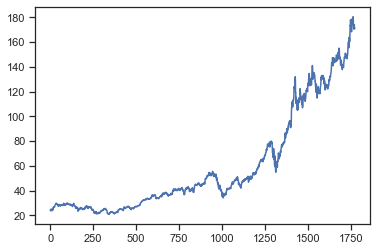

In [19]:
plt.plot(y);

In [21]:
# Saving the new dataset in a csv file for better handling
df_0.to_csv('Dataset_predicción.csv', index=False)